In [1]:
import ipynb.fs
from .defs.ELMo import ELMo, Tokenizer
import torch
import numpy as np
import math
from numpy import dot
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
model_path='./elmo_model'

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print('device: ' + str(device))

device: cpu


In [4]:
model = ELMo.from_checkpoint(model_path,device)

In [5]:
def get_embedding(text,word,model,device):
    model.to(device)
    tokenizer = model.tokenizer
    idx = text.split().index(word)
    model.eval()
    with torch.no_grad():
        w ,c , _ = tokenizer.tokenize(text,max_length=model.config["elmo"]["max_length"])
        w = w.unsqueeze(0).to(device)
        c = c.unsqueeze(0).to(device)
        f , b = model(w,c)
        encoder_embedding = f[0][0][idx].cpu().detach().numpy()
        hv =[]
        for i in range(1,len(f)):
            hv.append(torch.cat((f[i][0][idx],b[i][0][idx])).cpu().detach().numpy())
    h_mean = np.mean(hv,axis=0)
    return h_mean

In [6]:
def euclidean_distance(x1,x2):
    return math.sqrt(((x1-x2)**2).cumsum()[-1])

In [7]:
def cos(a,b):
    return dot(a, b)/(norm(a)*norm(b))

In [8]:
"queen" in model.tokenizer.word2id

True

In [9]:
text = "A great king and a queen ruled over that beautiful kingdom"
word = "king"
king = get_embedding(text,word,model,device)
word = "queen"
queen = get_embedding(text,word,model,device)
text = "I had egg for breakfast"
word = "egg"
eggs = get_embedding(text,word,model,device)
word = "breakfast"
breakfast = get_embedding(text,word,model,device)
word = "Dancing"
text = "Dancing is a good art"
dancing = get_embedding(text,word,model,device)

In [10]:
words ={
    "King":king,
    "Queen":queen,
    "Egg":eggs,
    "Breakfast":breakfast,
    "Dancing":dancing,
}

In [11]:
c_matrix = np.zeros((len(words),len(words)))
e_matrix = np.zeros((len(words),len(words)))
for i,w1 in enumerate(words.keys()):
    for j,w2 in enumerate(words.keys()):
        c_matrix[i][j] = cos(words[w1],words[w2])
        e_matrix[i][j] = euclidean_distance(words[w1],words[w2])      

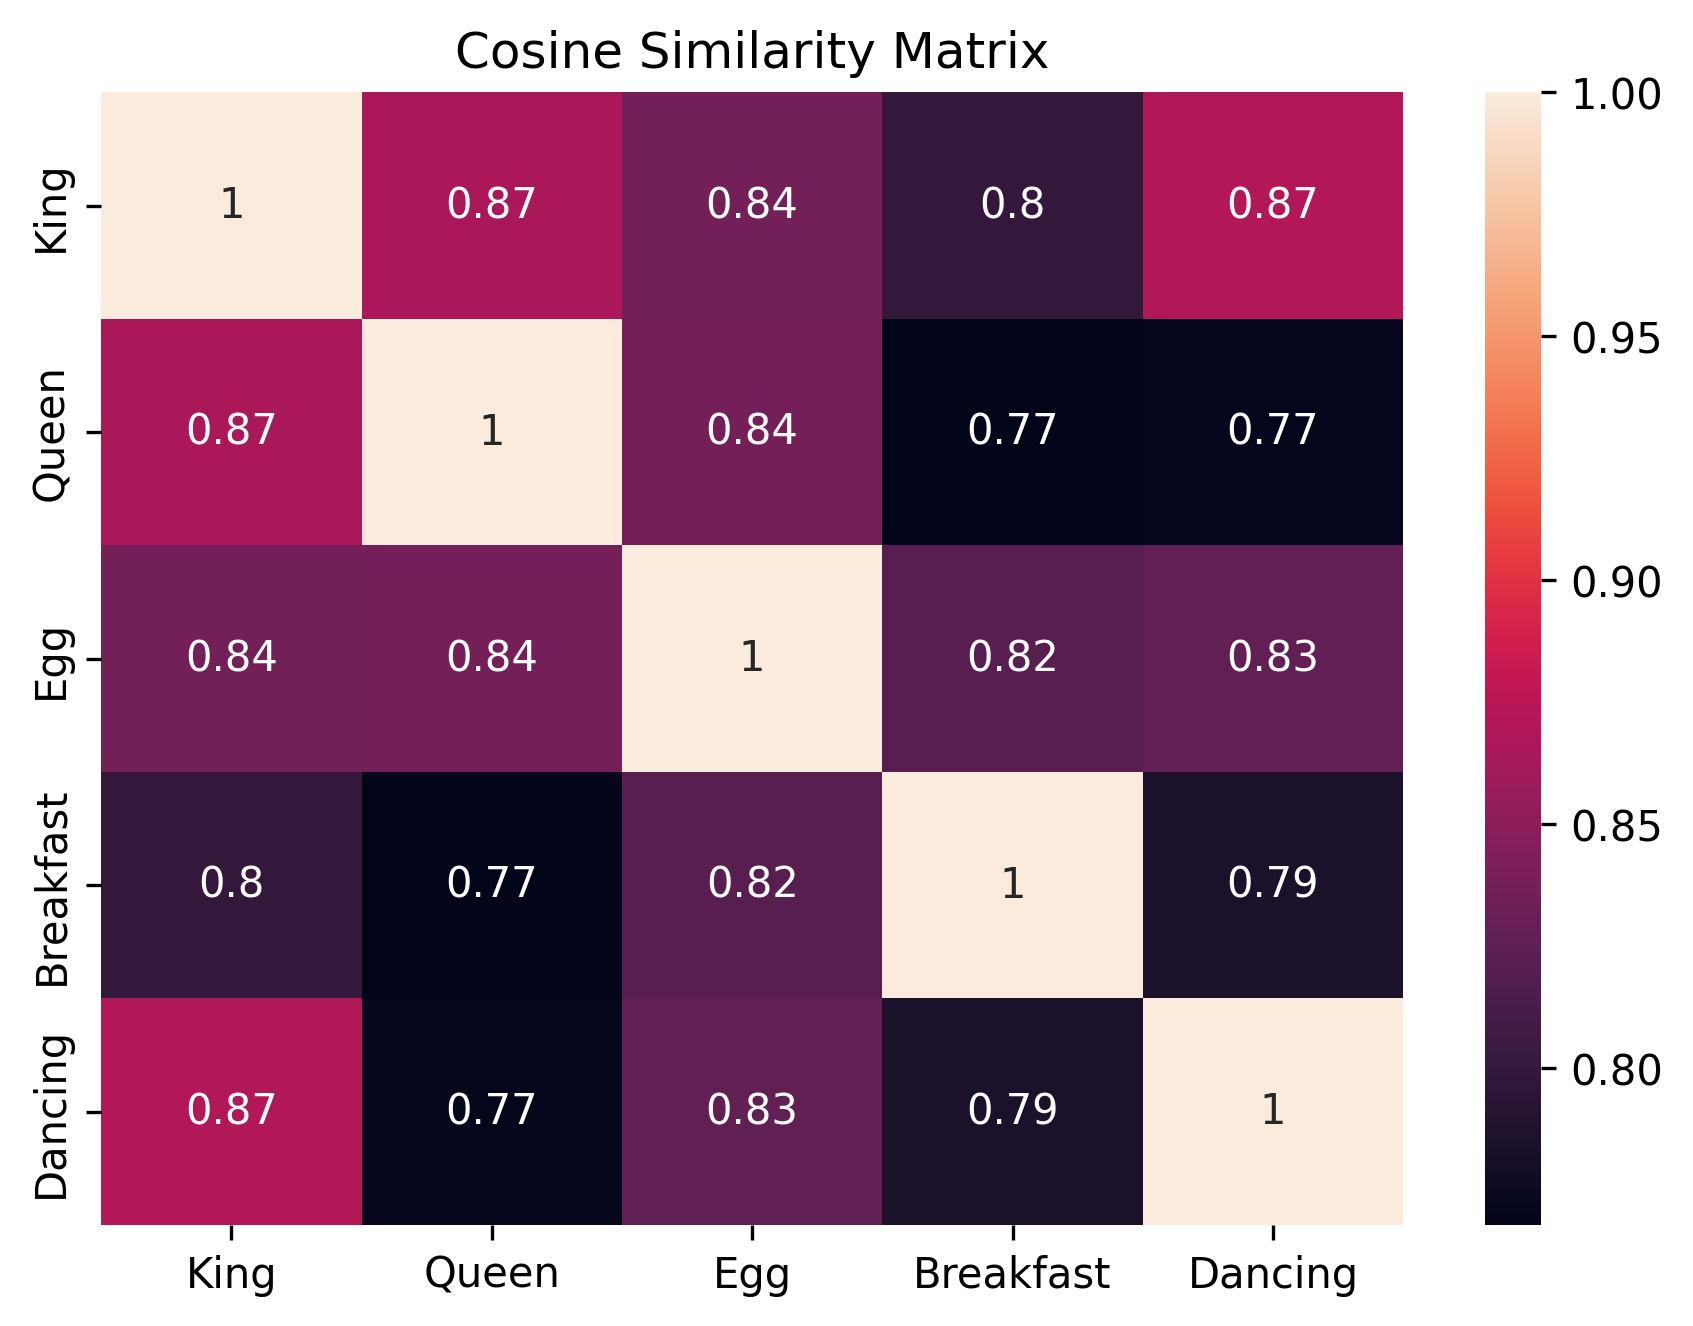

In [12]:
plt.figure(facecolor="white",figsize=(7,5),dpi=300)
sns.heatmap(c_matrix,annot=True,xticklabels=words.keys(),yticklabels=words.keys())
plt.title("Cosine Similarity Matrix")
plt.savefig("images/cos.png",dpi=300)
plt.show()

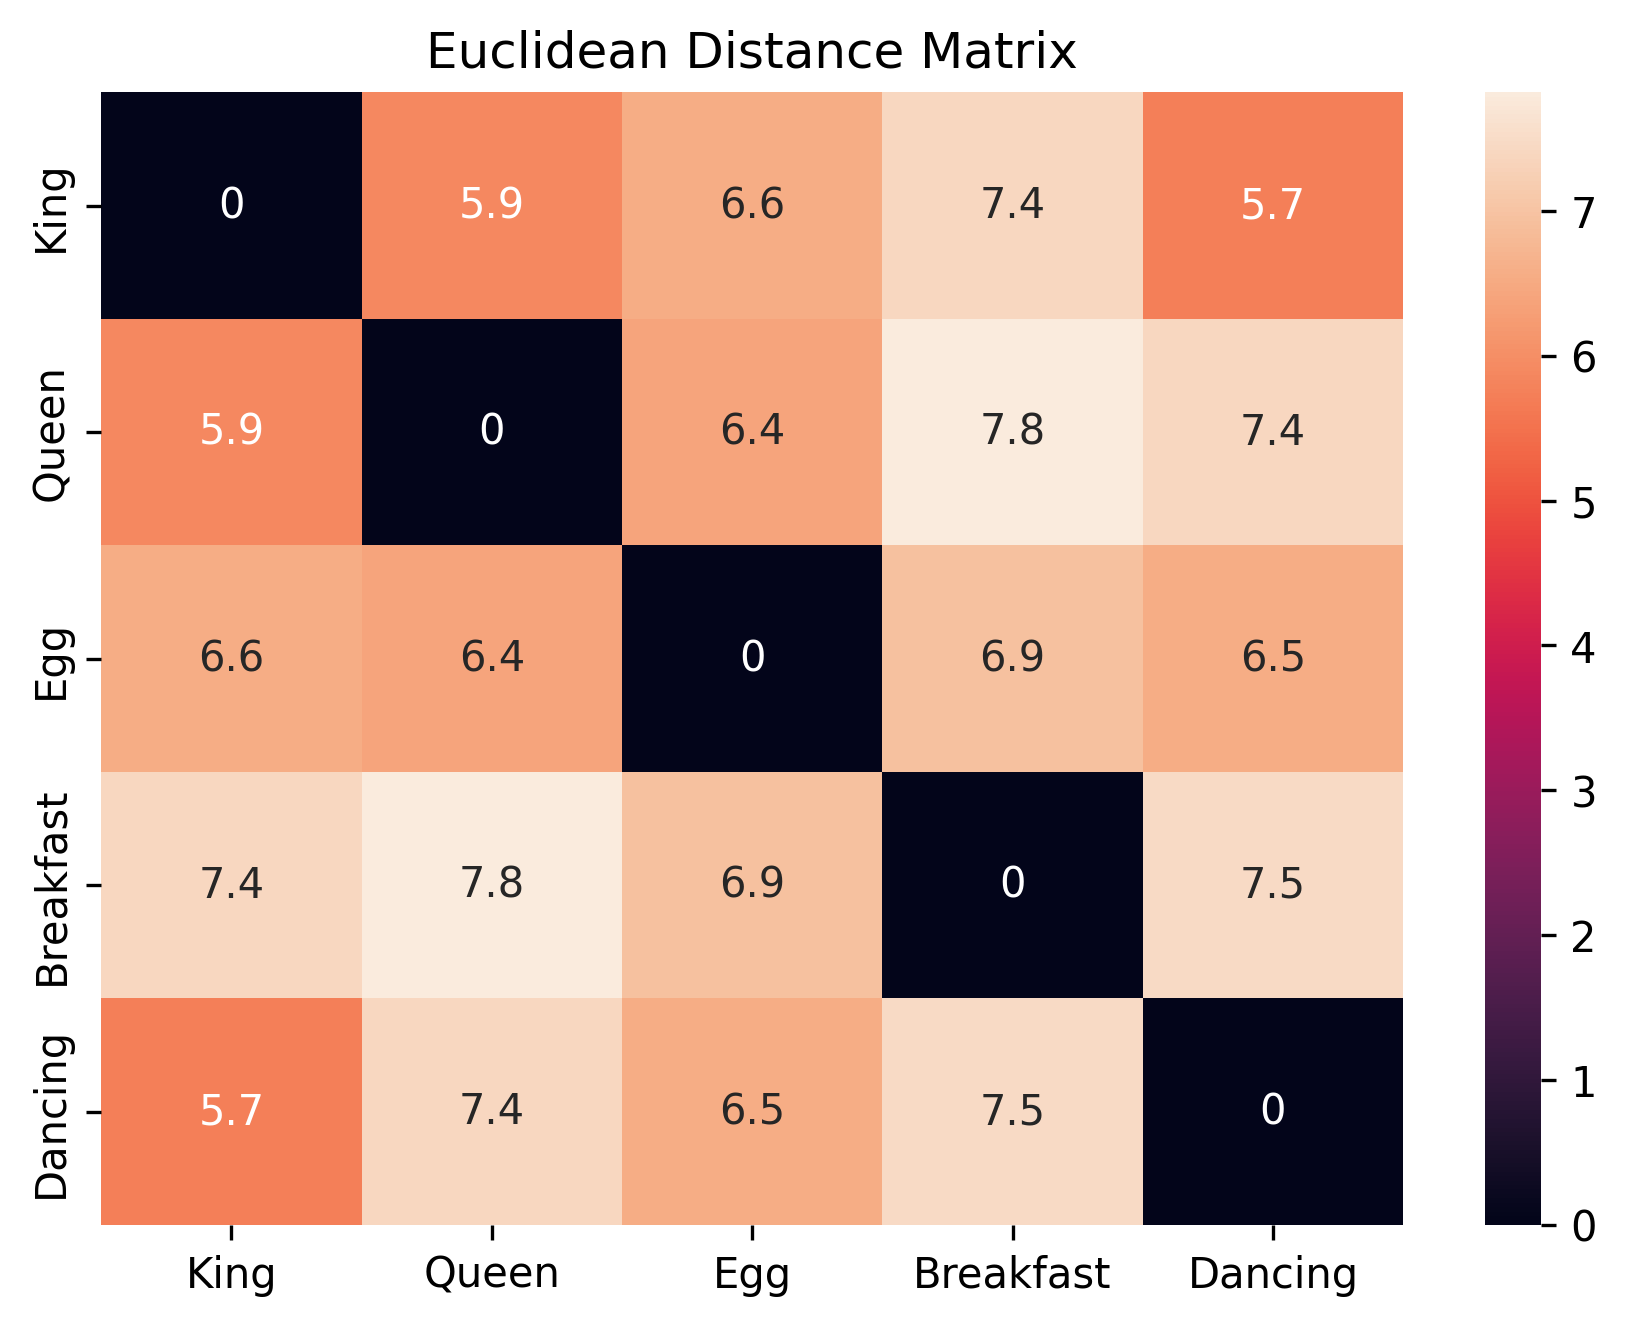

In [13]:
plt.figure(facecolor="white",figsize=(7,5),dpi=300)
sns.heatmap(e_matrix,annot=True,xticklabels=words.keys(),yticklabels=words.keys())
plt.title("Euclidean Distance Matrix")
plt.savefig("images/eucli.png",dpi=300)
plt.show()

In [14]:
text = "The orange from the supermarket was juicy and tasty. Their fruits are the best"
word = "orange"

In [15]:
orange1 = get_embedding(text,word,model,device)

In [16]:
text = "The artist painted his house with a tint of orange color and it looked vibrant"
word = "orange"
orange2 = get_embedding(text,word,model,device)

In [17]:
text = "The painting has a lot of vibrant colors and it looked beautiful."
word = "vibrant"
vibrant = get_embedding(text,word,model,device)

In [18]:
cos(orange1,vibrant)

0.8141281

In [19]:
cos(orange2,vibrant)

0.9127988